## Sales Forecasting - McD

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## Reading data
We are going to do time series analysis and forecasting for McD sales.

In [3]:
df = pd.read_csv('C:/Users/caiwenli/Box Sync/Marketing Intelligence/Data Science/Clients/Mc Donalds/Sales & Transaction Forecasting/Python Inputs/april_sale_data.csv')
df0 = df

In [10]:
df.head()

,Month,AdjSales,AvgSales,SalesStCt,SalesBase,SalesBaseChg,CompSales,PrevCompSales,CompSalesChg,AdjTrans,...,SalesSeasAdj,TransTDAdj,TransSeasAdj,AnltCompSales,PrevAnltCompSales,AnltCompSalesChg,AnltCompTrans,PrevAnltCompTrans,AnltCompTransChg,AnltCompCheckChg
0,1/1/2010,181887.4507,163164.4743,4113,182589.0285,-0.003842,667308705,673346365,-0.008967,35090.81400,...,0.897063,0.997740,0.894068,663341715,670391680,-0.010516,127604459,126996643,0.004786,-0.015229
1,2/1/2010,186832.4296,165714.9695,4109,183514.6830,0.018079,677864336,677352562,0.000756,35598.23263,...,0.886971,1.000000,0.868315,674602902,674736553,-0.000198,125826489,126453137,-0.004956,0.004781
2,3/1/2010,190839.3094,191438.3525,4118,184472.8895,0.034511,783166362,751660017,0.041916,36918.52234,...,1.003139,0.998242,1.003628,778806878,747690301,0.041617,150776231,142441297,0.058515,-0.015964
3,4/1/2010,189607.5609,188862.6147,4119,185456.1096,0.022385,772146135,744515897,0.037112,36942.91679,...,0.996071,1.006951,1.005767,766614718,739113091,0.037209,150909193,142443282,0.059434,-0.020978
4,5/1/2010,190852.8583,197901.8009,4110,186385.5957,0.023968,808188915,784715875,0.029913,36719.18260,...,1.036934,0.993306,1.048512,800231175,776808319,0.030153,155819965,149081124,0.045203,-0.014399


## Indexing with time series data

In [11]:
df.reset_index(inplace= False)
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month')
df.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01',
               '2019-03-01', '2019-04-01'],
              dtype='datetime64[ns]', name='Month', length=112, freq=None)

In [12]:
y = df['AnltCompSales']
y

Month
2010-01-01    663341715
2010-02-01    674602902
2010-03-01    778806878
2010-04-01    766614718
2010-05-01    800231175
2010-06-01    794480507
2010-07-01    850049545
2010-08-01    827617773
2010-09-01    770871822
2010-10-01    826006914
2010-11-01    742937187
2010-12-01    752089960
2011-01-01    683973039
2011-02-01    692608407
2011-03-01    802430744
2011-04-01    791405347
2011-05-01    821548870
2011-06-01    848989247
2011-07-01    885024675
2011-08-01    859528445
2011-09-01    805748829
2011-10-01    863033781
2011-11-01    792291606
2011-12-01    829025587
2012-01-01    742668215
2012-02-01    771613937
2012-03-01    872734450
2012-04-01    824938241
2012-05-01    863883451
2012-06-01    879379428
                ...    
2016-11-01    828727163
2016-12-01    851614799
2017-01-01    768804184
2017-02-01    790683533
2017-03-01    901584505
2017-04-01    865952552
2017-05-01    905192267
2017-06-01    915388433
2017-07-01    931018365
2017-08-01    917867988
2017-09-01

## Visualizing furniture sales time series data

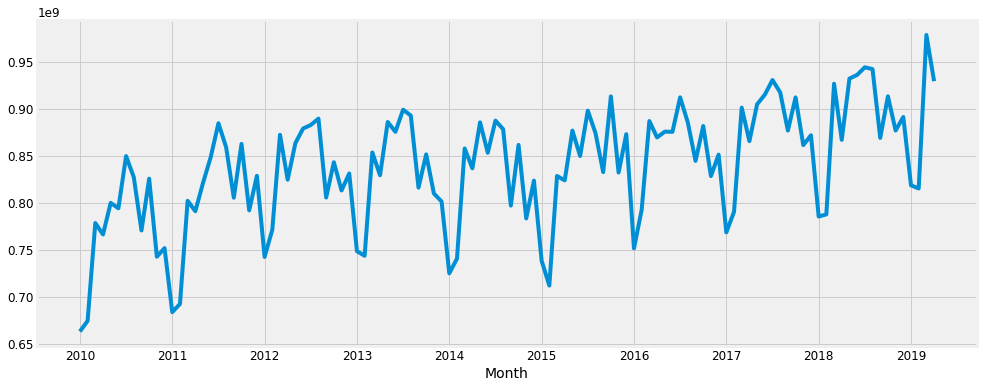

In [14]:
y.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always a strong upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

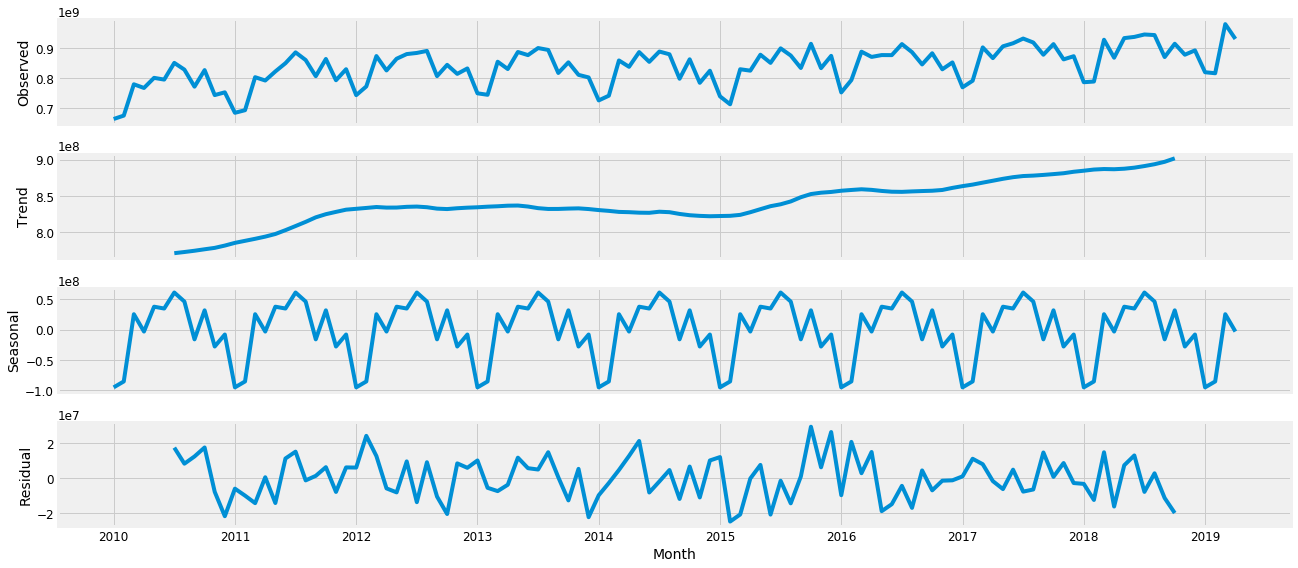

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

The plot above clearly shows that the sales of McD is unstable, along with its obvious seasonality.

## Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

Parameter Selection for the ARIMA Time Series Model

In [16]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [17]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6087.798095655265
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4290.162470697199
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3693.826716630438
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3235.251784223135


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3700.8961257348315
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3660.0707245645826
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3275.223043611507
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3231.176855561957
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4758.879327258494
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4224.379698776837


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3626.3236799313026
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3173.7171772069296
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4300.887275292308


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4216.970874589377
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3252.259380785471


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3174.132621485145
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4242.517797111693
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3728.60269141532
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:3593.153766940458
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:3154.7303791354702


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model

ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:3628.012604649519
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:3595.0301111178997
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:3193.0111080076476
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:3156.719625684317
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:4186.590402933902
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:3675.572845035496
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:3540.4985181747356


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:3103.493923567069
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:3723.2965725061094
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:3647.9964007840294


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:3175.669506616446
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:3104.8164335645893
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:4282.080889682016


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:3765.280812893324
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:3617.760315460916


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:3182.1984324348537
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:3734.8874448232577
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:3736.7187363023268


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:3181.30081962628


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:3182.7178089931886
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:4230.034510908048


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:3714.902720773715
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:3576.564386165309
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:3132.7145569375434


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:3723.1686439337013
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:3687.1016596700174


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:3168.478587857723


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:3133.9302789542166
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:4228.262700667577
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:3718.7229660086514
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:3575.320477843331


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:3138.713452014654
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:3684.964057411129
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:3686.867768120722


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:3135.8690617209486


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:3137.8613129228997
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:4188.252756971201
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:3674.3499497483203


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:3540.4333436333777


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:3103.9248609391707
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:3684.9395267040177
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:3649.2345088894094


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:3136.9951717579515


C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:3103.2562567700197


In [18]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Users\caiwenli\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3771      0.238     -1.582      0.114      -0.844       0.090
ma.L1         -0.1700      0.238     -0.713      0.476      -0.637       0.297
ar.S.L12      -0.3304      0.156     -2.120      0.034      -0.636      -0.025
ma.S.L12      -0.0040      0.127     -0.032      0.975      -0.252       0.244
sigma2      3.983e+14   1.35e-16   2.95e+30      0.000    3.98e+14    3.98e+14


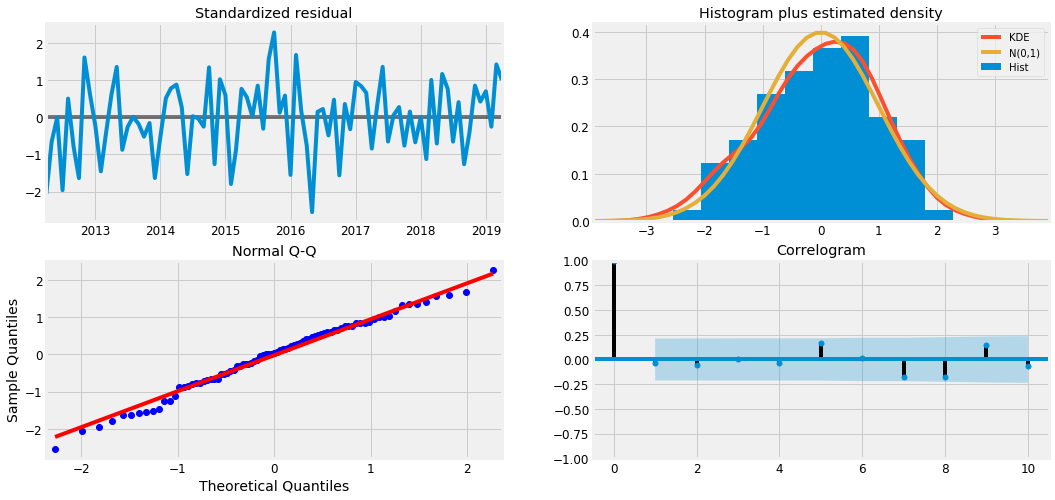

In [19]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Validating forecasts

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017-07-01 to the end of the data.

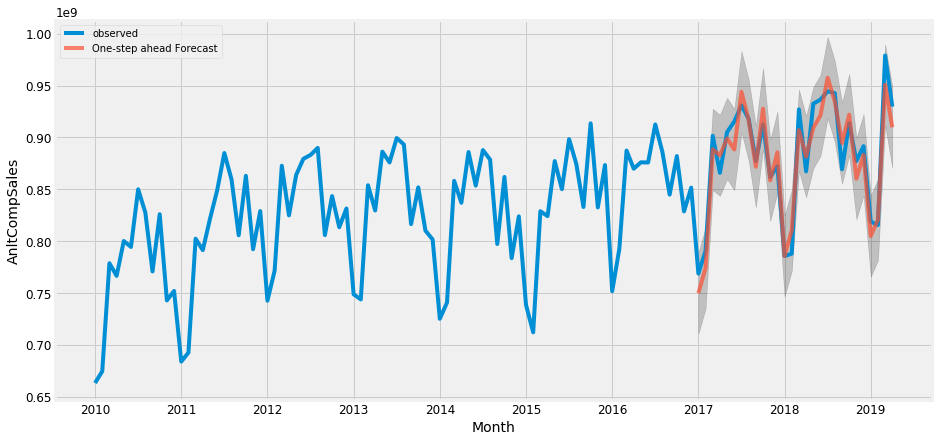

In [19]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Month')
ax.set_ylabel('AnltCompSales')
plt.legend()

plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year.

In [20]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 252071619470720.7


In [21]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 15876763.51


###### In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator—it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 16 millions of the real sales. Our McD monthly sales range from around 663 millions to over 979 millions. In my opinion, this is a pretty good model so far.

## Producing and visualizing forecasts

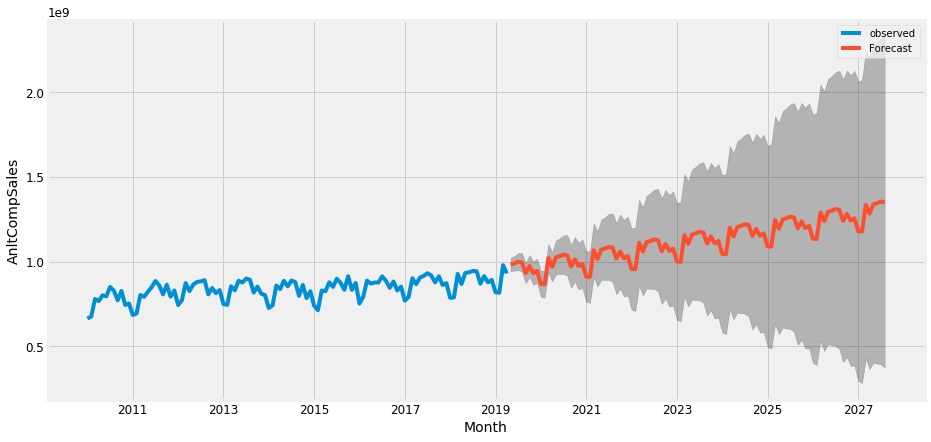

In [22]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Month')
ax.set_ylabel('AnltCompSales')

plt.legend()
plt.show()

Our model clearly captured McD sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

## Time Series comparison sale and transaction

### Data Preprocessing

In [23]:
salecol = ['Month','AnltCompSales']
sale = df0.reindex(columns=salecol)
trancol = ['Month','AnltCompTrans']
tran = df0.reindex(columns=trancol)

In [24]:
sale.shape, tran.shape

((112, 2), (112, 2))

In [25]:
sale.head()

,Month,AnltCompSales
0,2010-01-01,663341715
1,2010-02-01,674602902
2,2010-03-01,778806878
3,2010-04-01,766614718
4,2010-05-01,800231175


In [26]:
tran.head()

,Month,AnltCompTrans
0,2010-01-01,127604459
1,2010-02-01,125826489
2,2010-03-01,150776231
3,2010-04-01,150909193
4,2010-05-01,155819965


In [27]:
sale = pd.DataFrame(sale)
tran = pd.DataFrame(tran)

total = sale.merge(tran, how='inner', on='Month')
total.head()


,Month,AnltCompSales,AnltCompTrans
0,2010-01-01,663341715,127604459
1,2010-02-01,674602902,125826489
2,2010-03-01,778806878,150776231
3,2010-04-01,766614718,150909193
4,2010-05-01,800231175,155819965


In [29]:
from fbprophet import Prophet

sale = sale.rename(columns={'Month': 'ds', 'AnltCompSales': 'y'})
sale_model = Prophet(interval_width=0.95)
sale_model.fit(sale)

tran = tran.rename(columns={'Month': 'ds', 'AnltCompTrans': 'y'})
tran_model = Prophet(interval_width=0.95)
tran_model.fit(tran)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
sale_forecast = sale_model.make_future_dataframe(periods=36, freq='MS')
sale_forecast = sale_model.predict(sale_forecast)

tran_forecast = tran_model.make_future_dataframe(periods=36, freq='MS')
tran_forecast = tran_model.predict(tran_forecast)

<Figure size 1296x432 with 0 Axes>

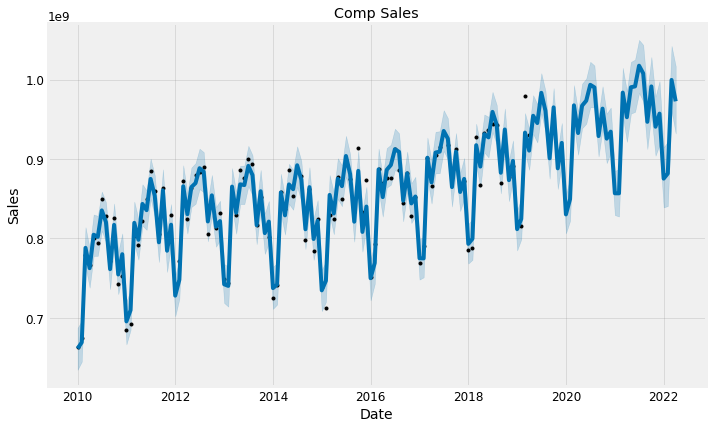

In [31]:
plt.figure(figsize=(18, 6))
sale_model.plot(sale_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Comp Sales');

<Figure size 1296x432 with 0 Axes>

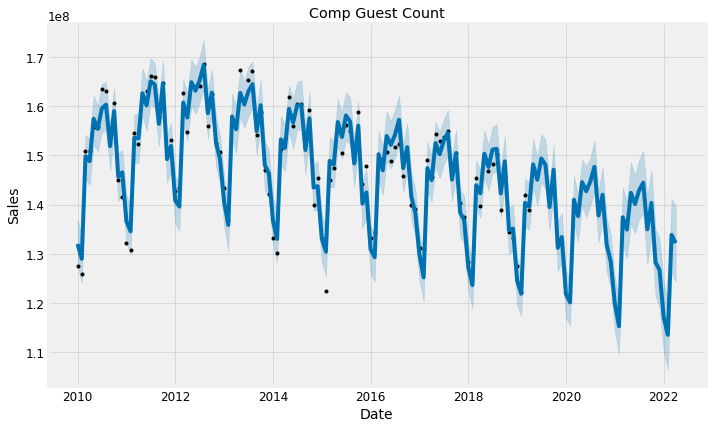

In [32]:
plt.figure(figsize=(18, 6))
tran_model.plot(tran_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Comp Guest Count');

In [34]:
sale_names = ['sale_%s' % column for column in sale_forecast.columns]
tran_names = ['tran_%s' % column for column in tran_forecast.columns]

merge_sale_forecast = sale_forecast.copy()
merge_tran_forecast = tran_forecast.copy()

merge_sale_forecast.columns = sale_names
merge_tran_forecast.columns = tran_names

forecast = pd.merge(merge_sale_forecast, merge_tran_forecast, how = 'inner', left_on = 'sale_ds', right_on = 'tran_ds')

forecast = forecast.rename(columns={'sale_ds': 'Date'}).drop('tran_ds', axis=1)
forecast.head()

,Date,sale_trend,sale_yhat_lower,sale_yhat_upper,sale_trend_lower,sale_trend_upper,sale_additive_terms,sale_additive_terms_lower,sale_additive_terms_upper,sale_yearly,...,tran_additive_terms,tran_additive_terms_lower,tran_additive_terms_upper,tran_yearly,tran_yearly_lower,tran_yearly_upper,tran_multiplicative_terms,tran_multiplicative_terms_lower,tran_multiplicative_terms_upper,tran_yhat
0,2010-01-01,7.553755e+08,6.344626e+08,6.873535e+08,7.553755e+08,7.553755e+08,-9.412881e+07,-9.412881e+07,-9.412881e+07,-9.412881e+07,...,-1.564355e+07,-1.564355e+07,-1.564355e+07,-1.564355e+07,-1.564355e+07,-1.564355e+07,0.0,0.0,0.0,1.319832e+08
1,2010-02-01,7.584455e+08,6.447172e+08,6.961834e+08,7.584455e+08,7.584455e+08,-8.942949e+07,-8.942949e+07,-8.942949e+07,-8.942949e+07,...,-1.906125e+07,-1.906125e+07,-1.906125e+07,-1.906125e+07,-1.906125e+07,-1.906125e+07,0.0,0.0,0.0,1.289738e+08
2,2010-03-01,7.612183e+08,7.646859e+08,8.139936e+08,7.612183e+08,7.612183e+08,2.679827e+07,2.679827e+07,2.679827e+07,2.679827e+07,...,1.419523e+06,1.419523e+06,1.419523e+06,1.419523e+06,1.419523e+06,1.419523e+06,0.0,0.0,0.0,1.498233e+08
3,2010-04-01,7.642883e+08,7.378720e+08,7.876938e+08,7.642883e+08,7.642883e+08,-1.857273e+06,-1.857273e+06,-1.857273e+06,-1.857273e+06,...,-1.447068e+04,-1.447068e+04,-1.447068e+04,-1.447068e+04,-1.447068e+04,-1.447068e+04,0.0,0.0,0.0,1.487976e+08
4,2010-05-01,7.672592e+08,7.778315e+08,8.299969e+08,7.672592e+08,7.672592e+08,3.730305e+07,3.730305e+07,3.730305e+07,3.730305e+07,...,8.215371e+06,8.215371e+06,8.215371e+06,8.215371e+06,8.215371e+06,8.215371e+06,0.0,0.0,0.0,1.574226e+08


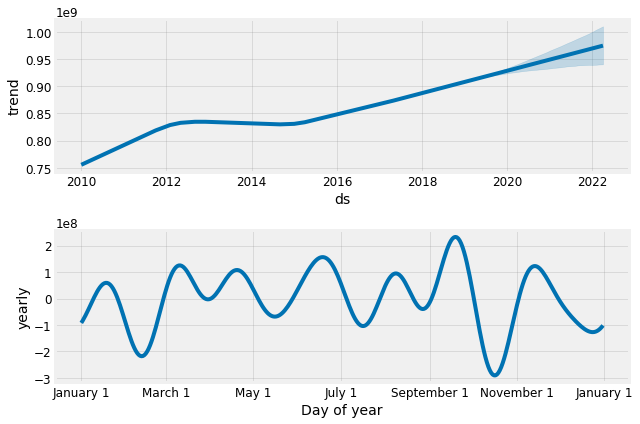

In [40]:
sale_model.plot_components(sale_forecast);

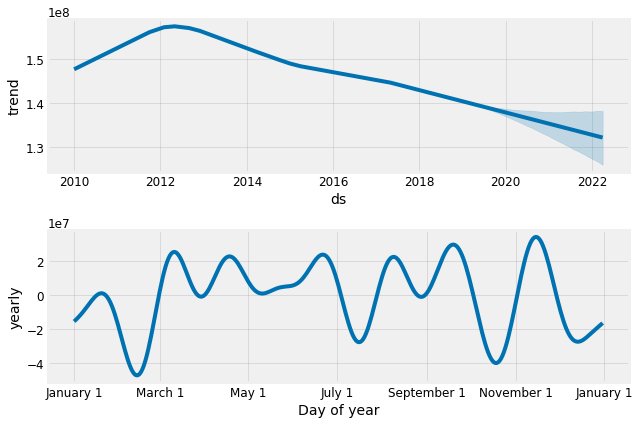

In [41]:
tran_model.plot_components(tran_forecast);